In [0]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 48kB/s 
     |████████████████████████████████| 4.3MB 25.8MB/s 
     |████████████████████████████████| 501kB 42.5MB/s 


In [0]:
import tensorflow as tf
print(tf.__version__)

2.0.0-rc0


In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import numpy as np
import csv
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score


import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMRegressor

import gc

In [0]:
from google.colab import files
uploaded= files.upload()

Saving AAPL.csv to AAPL (1).csv


In [0]:
df =pd.read_csv('AAPL (1).csv')

In [0]:
df.set_index('Date', inplace = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-02,107.699997,108.000000,106.820000,107.730003,102.692284,26802500
2016-09-06,107.900002,108.300003,107.510002,107.699997,102.663673,26880400
2016-09-07,107.830002,108.760002,107.070000,108.360001,103.292809,42364300
2016-09-08,107.250000,107.269997,105.239998,105.519997,100.585609,53002000
2016-09-09,104.639999,105.720001,103.129997,103.129997,98.307373,46557000


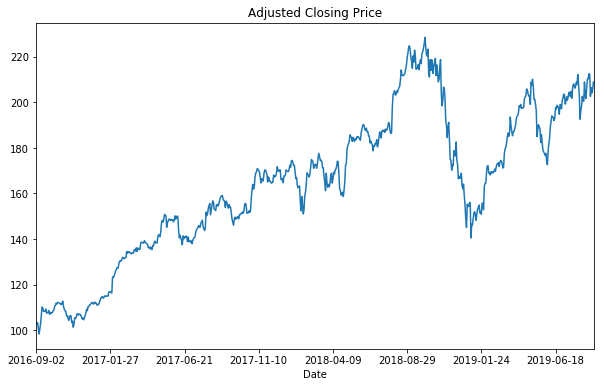

In [0]:
df['Adj Close'].plot(label = 'Apple', figsize = (10, 6), title= 'Adjusted Closing Price')

In [0]:
split_time = int(0.8*len(time))
split_time 


602

In [0]:

window_size = 30
batch_size = 32
shuffle_buffer_size = 300

num_samples = len(df) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)

[[  0   1   2 ...  28  29  30]
 [  1   2   3 ...  29  30  31]
 [  2   3   4 ...  30  31  32]
 ...
 [720 721 722 ... 748 749 750]
 [721 722 723 ... 749 750 751]
 [722 723 724 ... 750 751 752]]


In [0]:
data= df['Adj Close'].values[indices]


In [0]:
X = data[:,:-1] 
y = data[:,-1]

In [0]:
X_train = X[:split_time]
y_train =y[:split_time]
X_test =X[split_time:]
y_test= y[split_time:]

In [0]:

def rmsle(y, y_pred):
    return np.sqrt(sk.metrics.mean_squared_error(y, y_pred))


In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

ridge = RidgeCV().fit(X_train, y_train)
lasso = LassoCV().fit(X_train, y_train)
elasticnet = ElasticNetCV().fit(X_train, y_train)                             
svr =SVR(C= 100, epsilon= 0.008, gamma=0.0003,).fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [0]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

gbr_model = gbr.fit(X_train, y_train)




lightgbm = LGBMRegressor()

clf = lightgbm.fit(X_train, y_train)
y_mean = np.mean(y_train)
from xgboost import XGBRegressor

xgboost = XGBRegressor()

xgboost_model = xgboost.fit(X_train, y_train)

[22:44:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:614: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase memory consumption")


In [0]:
from mlxtend.regressor import StackingCVRegressor

stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr_model, xgboost_model, clf),
                                meta_regressor=elasticnet,
                                use_features_in_secondary=True)
stack_gen_model= stack_gen.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr

[22:44:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:44:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:44:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:44:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:44:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81.43102327261568, tolerance: 52.52166783394463
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureW

[22:44:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:

print('ridge' ,rmsle(y_test, ridge.predict(X_test)))
print('lasso' ,rmsle(y_test, lasso.predict(X_test)))
print('elasticnet' ,rmsle(y_test, elasticnet.predict(X_test)))
print('svr' ,rmsle(y_test, svr.predict(X_test)))
print('gbr' ,rmsle(y_test, gbr.predict(X_test)))
print('lightgbm' ,rmsle(y_test, clf.predict(X_test)))
print('XGB' ,rmsle(y_test, xgboost_model.predict(X_test)))
print('stack_gen_model' ,rmsle(y_test, stack_gen_model.predict(X_test)))

ridge 3.344614981412704
lasso 3.291664444763504
elasticnet 3.309005709438133
svr 7.670665015844277
gbr 4.093857525641122
lightgbm 4.322923713142871
XGB 4.1556499537612375
stack_gen_model 3.3938335626924916


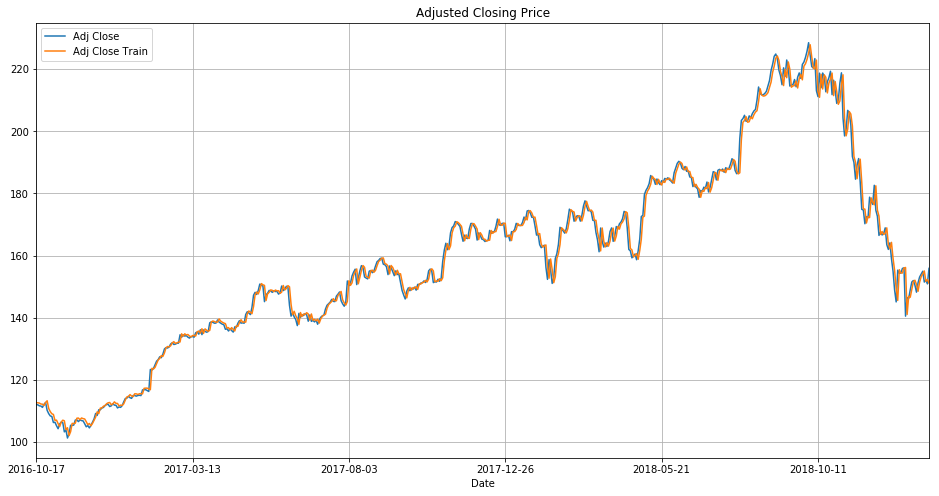

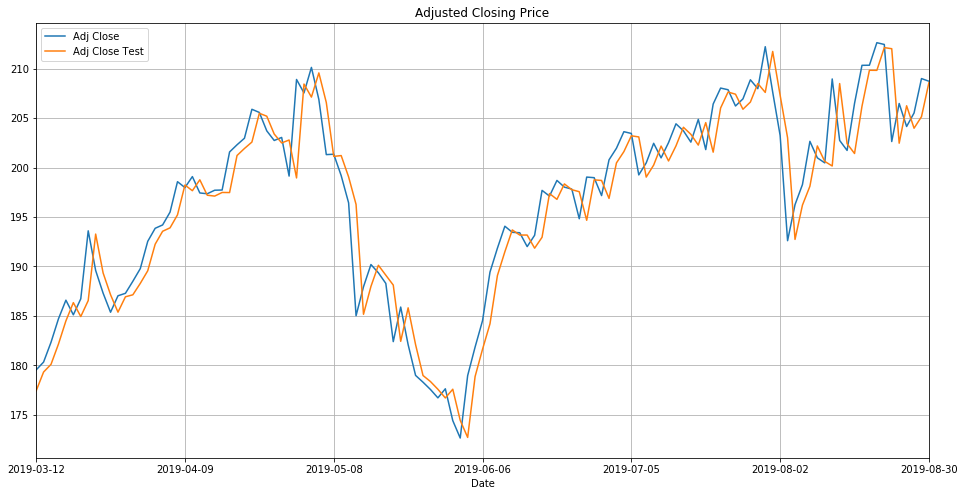

In [0]:
df_lasso = df.copy()
df_lasso.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lasso = df_lasso.iloc[window_size:split_time] # Past 32 days we don't know yet
df_lasso['Adj Close Train'] = lasso.predict(X_train)[:-window_size]
df_lasso.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)


df_lasso = df.copy()
df_lasso.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lasso = df_lasso.iloc[window_size+split_time:]
df_lasso['Adj Close Test'] = lasso.predict(X_test)
df_lasso.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)

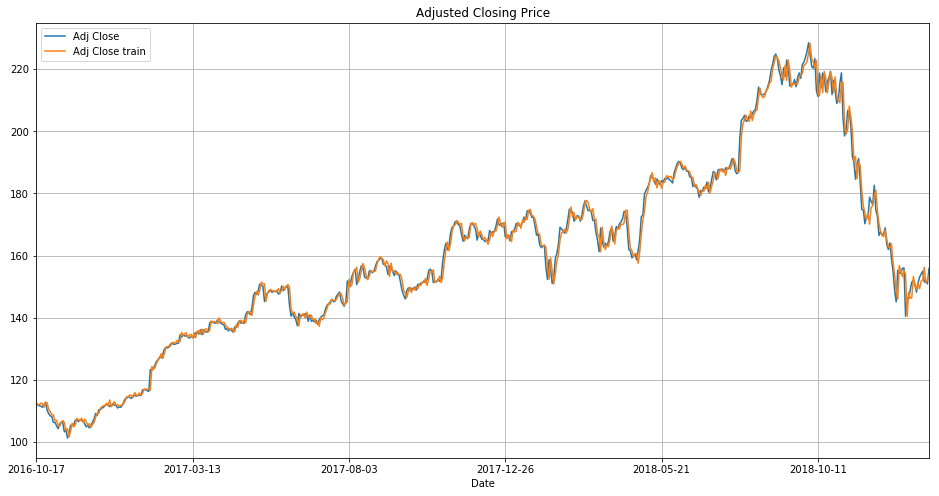

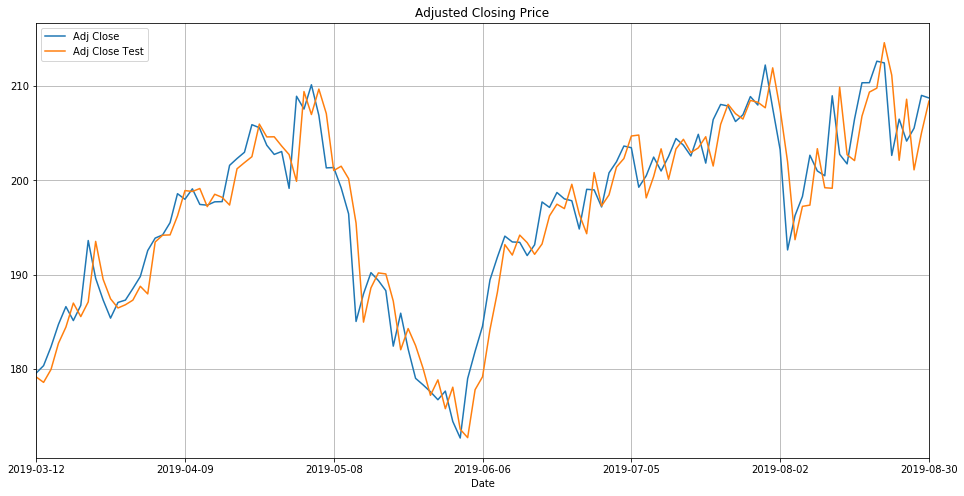

In [0]:
df_ridge = df.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[window_size:split_time]
df_ridge['Adj Close train'] = ridge.predict(X_train)[:-window_size]
df_ridge.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)

df_ridge = df.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[window_size+split_time:]
df_ridge['Adj Close Test'] = ridge.predict(X_test)
df_ridge.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)

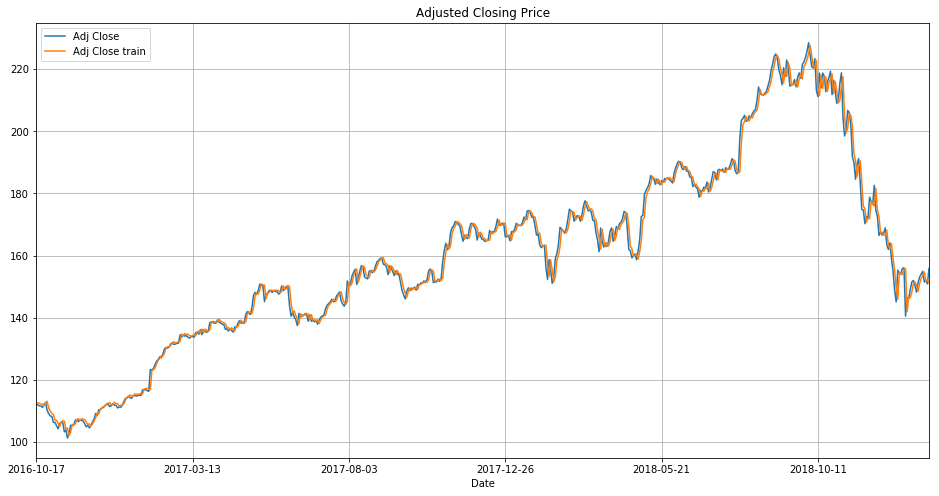

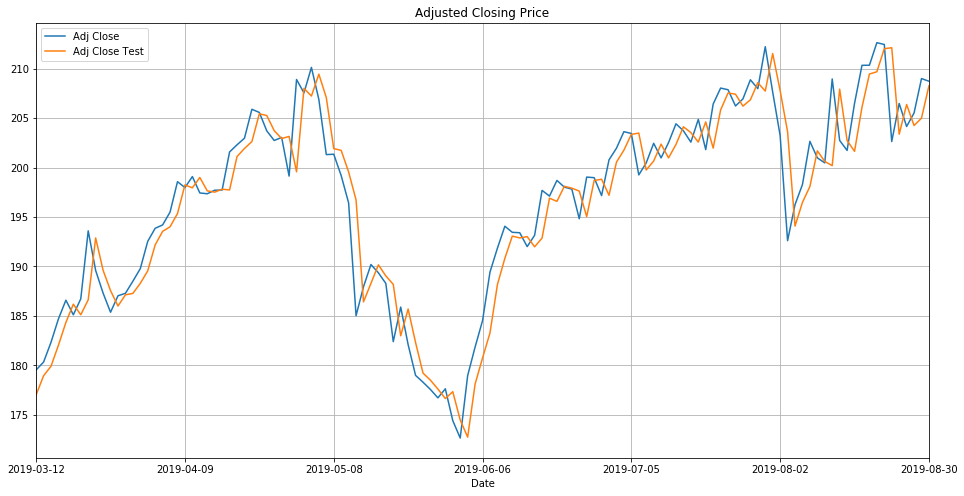

In [0]:
df_elsastic = df.copy()
df_elsastic.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_elsastic = df_elsastic.iloc[window_size:split_time]
df_elsastic['Adj Close train'] = elasticnet.predict(X_train)[:-window_size]
df_elsastic.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)

df_elsastic = df.copy()
df_elsastic.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_elsastic = df_elsastic.iloc[window_size+split_time:]
df_elsastic['Adj Close Test'] = elasticnet.predict(X_test)
df_elsastic.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)

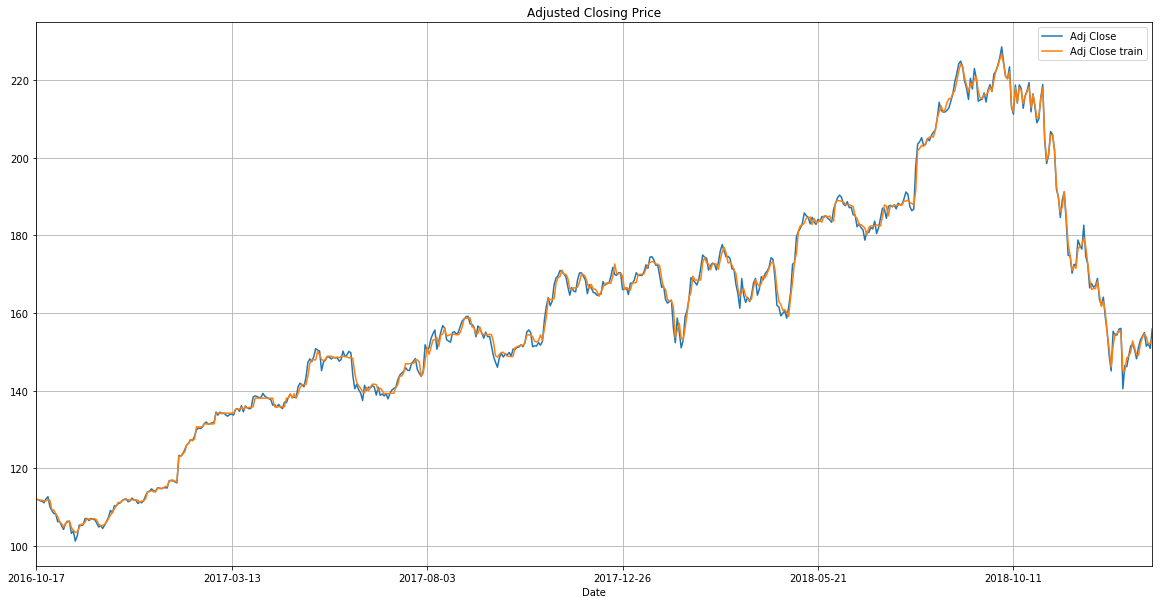

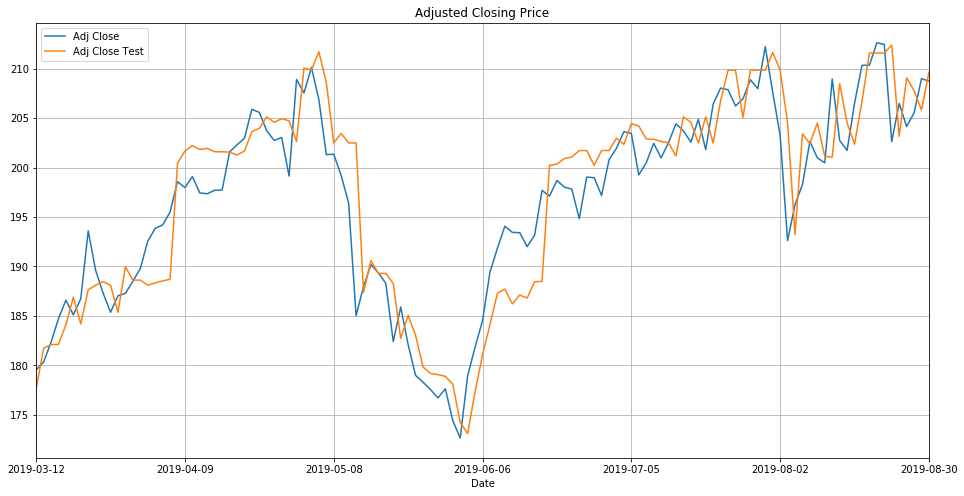

In [0]:
df_xgboost_model = df.copy()
df_xgboost_model.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_xgboost_model = df_xgboost_model.iloc[window_size:split_time]
df_xgboost_model['Adj Close train'] = xgboost_model.predict(X_train)[:-window_size]
df_xgboost_model.plot(label='AAPL', figsize=(20,10), title='Adjusted Closing Price', grid=True)


df_xgboost_model = df.copy()
df_xgboost_model.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_xgboost_model = df_xgboost_model.iloc[window_size+split_time:]
df_xgboost_model['Adj Close Test'] =xgboost_model.predict(X_test)
df_xgboost_model.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)

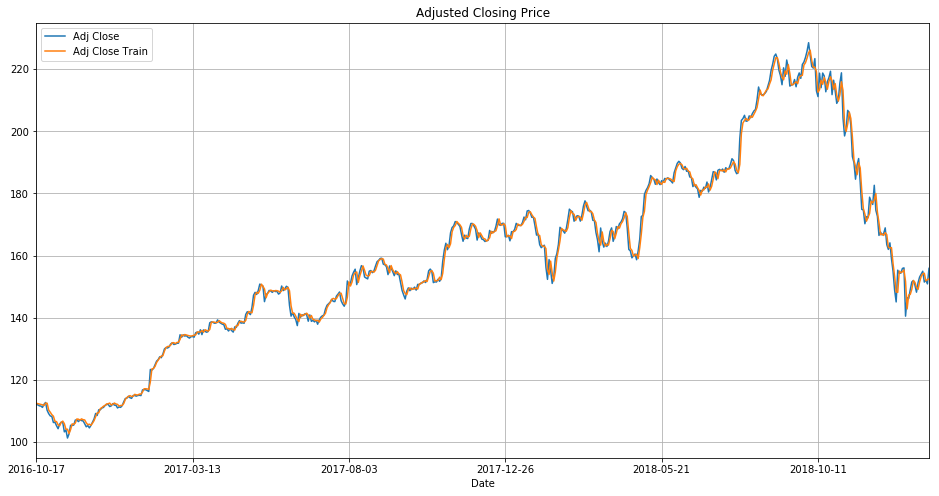

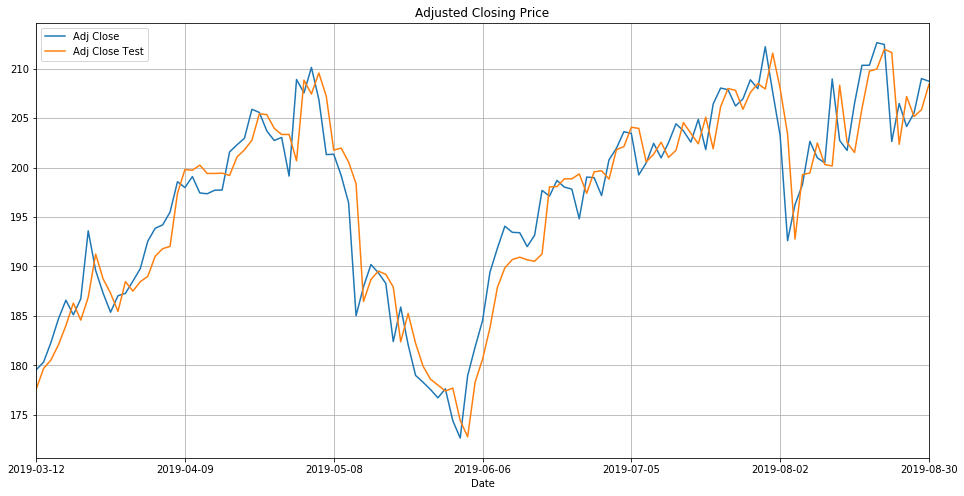

In [0]:
df_stack_gen_model = df.copy()
df_stack_gen_model.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_stack_gen_model = df_stack_gen_model.iloc[window_size:split_time] # Past 32 days we don't know yet
df_stack_gen_model['Adj Close Train'] = stack_gen_model.predict(X_train)[:-window_size]
df_stack_gen_model.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)


df_stack_gen_model = df.copy()
df_stack_gen_model.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_stack_gen_model = df_stack_gen_model.iloc[window_size+split_time:]
df_stack_gen_model['Adj Close Test'] = stack_gen_model.predict(X_test)
df_stack_gen_model.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)

In [0]:

scaler = sk.preprocessing.MinMaxScaler(feature_range=(-1, 1))
data_transform = scaler.fit_transform(df['Adj Close'].values[:,None])
data_transform = data_transform[indices]

In [0]:
X2 = data_transform[:,:-1]
y2 = data_transform[:,-1]
X_train_reshape = X2[:split_time]
y_train_reshape = y2[:split_time]
X_test_reshape = X2[split_time:]
y_test_reshape = y2[split_time:]



In [0]:
keras_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=5, input_shape=(window_size, 1), strides=1, padding="causal", activation="relu"), 
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(1)
])


optimizer = tf.keras.optimizers.Adam()
keras_model.compile(loss=tf.keras.losses.Huber(),
                    optimizer=optimizer,
                    metrics=["mae"])
history = keras_model.fit(X_train_reshape, y_train_reshape, batch_size=256, epochs=250, validation_data=(X_test_reshape, y_test_reshape))

Train on 602 samples, validate on 121 samples
Epoch 1/250
602/602 [==============================] - 2s 4ms/sample - loss: 0.1006 - mae: 0.3520 - val_loss: 0.1346 - val_mae: 0.4988
Epoch 2/250
602/602 [==============================] - 0s 92us/sample - loss: 0.0777 - mae: 0.3080 - val_loss: 0.1168 - val_mae: 0.4642
Epoch 3/250
602/602 [==============================] - 0s 87us/sample - loss: 0.0570 - mae: 0.2597 - val_loss: 0.0914 - val_mae: 0.4092
Epoch 4/250
602/602 [==============================] - 0s 84us/sample - loss: 0.0327 - mae: 0.1834 - val_loss: 0.0527 - val_mae: 0.3042
Epoch 5/250
602/602 [==============================] - 0s 80us/sample - loss: 0.0182 - mae: 0.1438 - val_loss: 0.0112 - val_mae: 0.1406
Epoch 6/250
602/602 [==============================] - 0s 77us/sample - loss: 0.0102 - mae: 0.1183 - val_loss: 0.0163 - val_mae: 0.1365
Epoch 7/250
602/602 [==============================] - 0s 96us/sample - loss: 0.0110 - mae: 0.1090 - val_loss: 0.0082 - val_mae: 0.0852
Epo

keras_model 3.5712079168409674


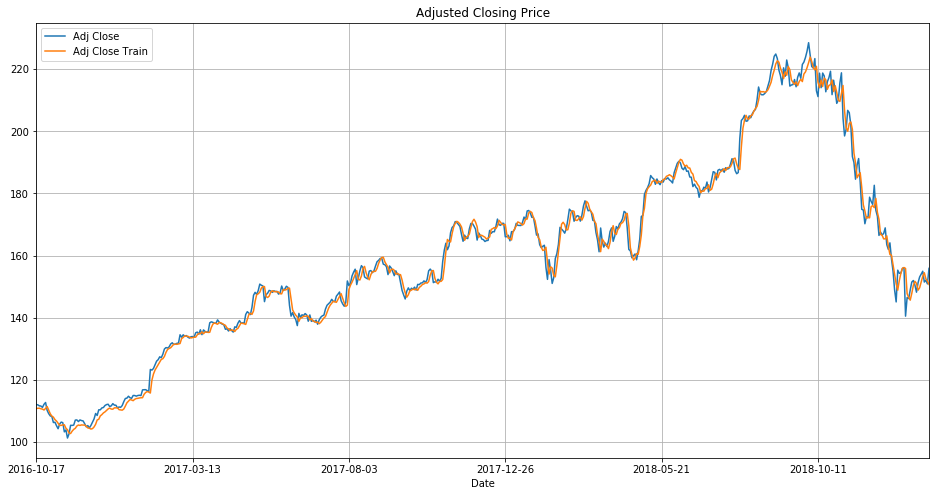

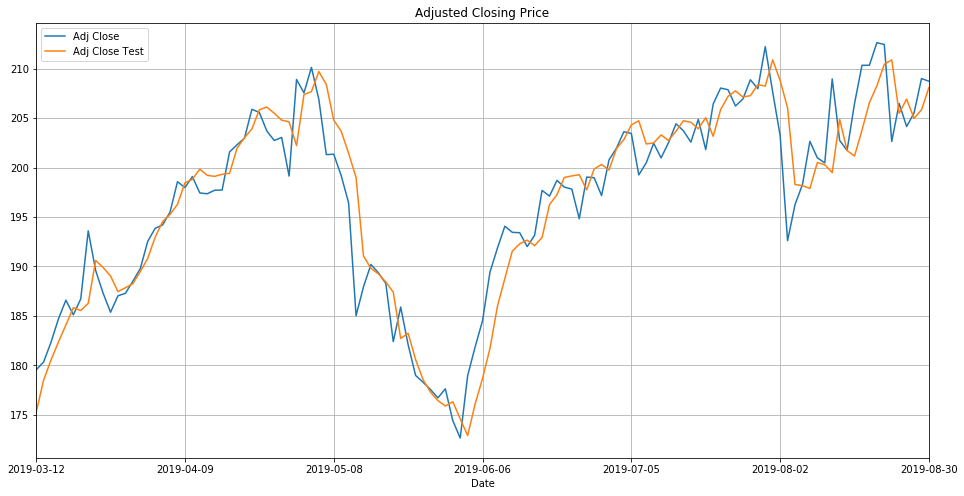

In [0]:
y_pred_train_keras = scaler.inverse_transform(keras_model.predict(X_train_reshape, batch_size=256))
y_pred_keras = scaler.inverse_transform(keras_model.predict(X_test_reshape, batch_size=256))
print('keras_model' ,rmsle(y_test, y_pred_keras))


df_keras = df.copy()
df_keras.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_keras = df_keras.iloc[window_size:split_time] 
df_keras['Adj Close Train'] = y_pred_train_keras[:-window_size]
df_keras.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)
df_keras = df.copy()
df_keras.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_keras = df_keras.iloc[split_time+window_size:] 
df_keras['Adj Close Test'] = y_pred_keras
df_keras.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

In [0]:
keras_model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=5, input_shape=(window_size, 1), strides=1, padding="causal", activation="relu"), 
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences= True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(1)
])


optimizer = tf.keras.optimizers.Adam()
keras_model_2.compile(loss=tf.keras.losses.Huber(),
                    optimizer=optimizer,
                    metrics=["mae"])
history = keras_model_2.fit(X_train_reshape, y_train_reshape, batch_size=256, epochs=250, validation_data=(X_test_reshape, y_test_reshape))

Train on 602 samples, validate on 121 samples
Epoch 1/250
602/602 [==============================] - 7s 11ms/sample - loss: 0.0944 - mae: 0.3411 - val_loss: 0.0741 - val_mae: 0.3618
Epoch 2/250
602/602 [==============================] - 0s 235us/sample - loss: 0.0485 - mae: 0.2456 - val_loss: 0.0136 - val_mae: 0.1513
Epoch 3/250
602/602 [==============================] - 0s 236us/sample - loss: 0.0153 - mae: 0.1323 - val_loss: 0.0173 - val_mae: 0.1317
Epoch 4/250
602/602 [==============================] - 0s 232us/sample - loss: 0.0227 - mae: 0.1774 - val_loss: 0.0124 - val_mae: 0.1453
Epoch 5/250
602/602 [==============================] - 0s 234us/sample - loss: 0.0108 - mae: 0.1185 - val_loss: 0.0141 - val_mae: 0.1589
Epoch 6/250
602/602 [==============================] - 0s 247us/sample - loss: 0.0138 - mae: 0.1327 - val_loss: 0.0091 - val_mae: 0.1243
Epoch 7/250
602/602 [==============================] - 0s 240us/sample - loss: 0.0098 - mae: 0.1079 - val_loss: 0.0071 - val_mae: 0.1

In [0]:
y_pred_train_keras_2 = scaler.inverse_transform(keras_model_2.predict(X_train_reshape, batch_size=256))
y_pred_keras_2 = scaler.inverse_transform(keras_model_2.predict(X_test_reshape, batch_size=256))
print('keras_model_2' ,rmsle(y_test, y_pred_keras_2))


keras_model_2 3.830110663074273


In [0]:
keras_model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=5, input_shape=(window_size, 1), strides=1, padding="causal", activation="relu"), 

  tf.keras.layers.LSTM(64),

  tf.keras.layers.Dense(1),
])


optimizer = tf.keras.optimizers.Adam()
keras_model_3.compile(loss=tf.keras.losses.Huber(),
                    optimizer=optimizer,
                    metrics=["mae"])
history = keras_model_3.fit(X_train_reshape, y_train_reshape, batch_size=256, epochs=500, validation_data=(X_test_reshape, y_test_reshape))

Train on 602 samples, validate on 121 samples
Epoch 1/500
602/602 [==============================] - 2s 4ms/sample - loss: 0.0768 - mae: 0.3063 - val_loss: 0.0493 - val_mae: 0.2956
Epoch 2/500
602/602 [==============================] - 0s 84us/sample - loss: 0.0286 - mae: 0.1878 - val_loss: 0.0134 - val_mae: 0.1520
Epoch 3/500
602/602 [==============================] - 0s 86us/sample - loss: 0.0069 - mae: 0.0934 - val_loss: 0.0116 - val_mae: 0.1157
Epoch 4/500
602/602 [==============================] - 0s 85us/sample - loss: 0.0148 - mae: 0.1443 - val_loss: 0.0125 - val_mae: 0.1225
Epoch 5/500
602/602 [==============================] - 0s 85us/sample - loss: 0.0095 - mae: 0.1091 - val_loss: 0.0057 - val_mae: 0.0810
Epoch 6/500
602/602 [==============================] - 0s 78us/sample - loss: 0.0043 - mae: 0.0691 - val_loss: 0.0060 - val_mae: 0.0975
Epoch 7/500
602/602 [==============================] - 0s 83us/sample - loss: 0.0052 - mae: 0.0800 - val_loss: 0.0084 - val_mae: 0.1189
Epo

In [0]:
y_pred_train_keras_3 = scaler.inverse_transform(keras_model_3.predict(X_train_reshape, batch_size=256))
y_pred_keras_3 = scaler.inverse_transform(keras_model_3.predict(X_test_reshape, batch_size=256))
print('keras_model_3' ,rmsle(y_test, y_pred_keras_3))

keras_model_3 3.4073730739011743


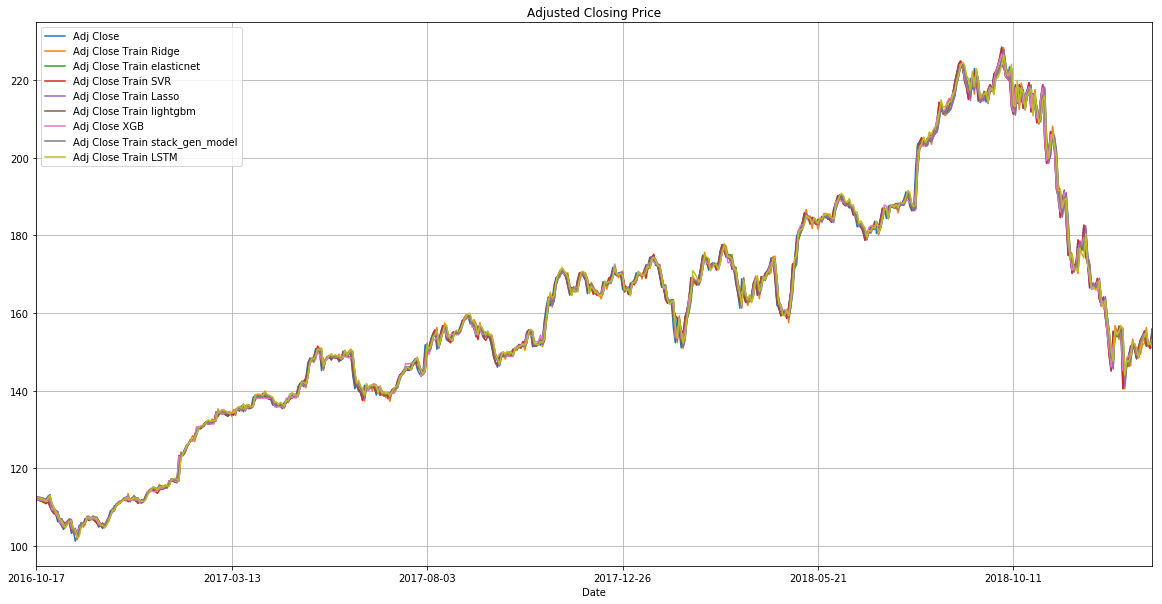

In [0]:



df_train = df.copy()
df_train.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_train = df_train.iloc[window_size:split_time] 
df_train['Adj Close Train Ridge'] = ridge.predict(X_train)[:-window_size]
df_train['Adj Close Train elasticnet'] = elasticnet.predict(X_train)[:-window_size]
df_train['Adj Close Train SVR'] = svr.predict(X_train)[:-window_size]
df_train['Adj Close Train Lasso'] =lasso.predict(X_train)[:-window_size]
df_train['Adj Close Train lightgbm'] = clf.predict(X_train)[:-window_size]
df_train['Adj Close XGB']= xgboost_model.predict(X_train)[:-window_size]
df_train['Adj Close Train stack_gen_model'] = stack_gen_model.predict(X_train)[:-window_size]
df_train['Adj Close Train LSTM'] = y_pred_train_keras_3[:-window_size]

df_train.plot(label='AAPL', figsize=(20,10), title='Adjusted Closing Price', grid=True)

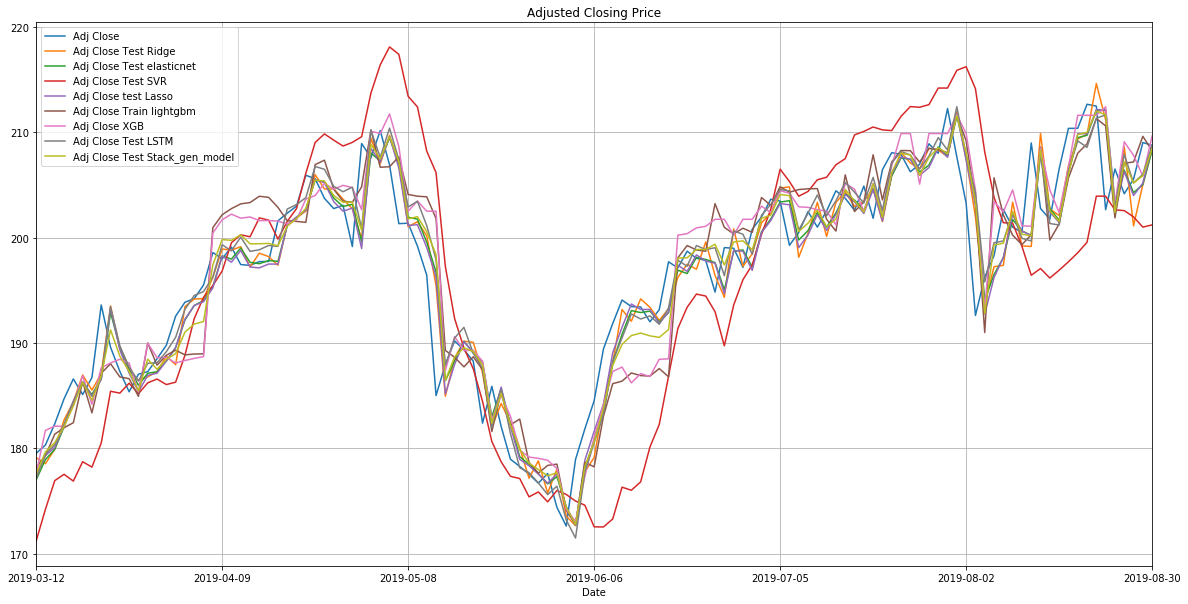

In [0]:
df_test = df.copy()
df_test.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_test = df_test.iloc[window_size+split_time:] 
df_test['Adj Close Test Ridge'] = ridge.predict(X_test)
df_test['Adj Close Test elasticnet'] = elasticnet.predict(X_test)
df_test['Adj Close Test SVR'] = svr.predict(X_test)
df_test['Adj Close test Lasso'] =lasso.predict(X_test)
df_test['Adj Close Train lightgbm'] = clf.predict(X_test)
df_test['Adj Close XGB']= xgboost_model.predict(X_test)
df_test['Adj Close Test LSTM'] = y_pred_keras_3 
df_test['Adj Close Test Stack_gen_model'] = stack_gen_model.predict(X_test)
df_test.plot(label='AAPL', figsize=(20,10), title='Adjusted Closing Price', grid=True)

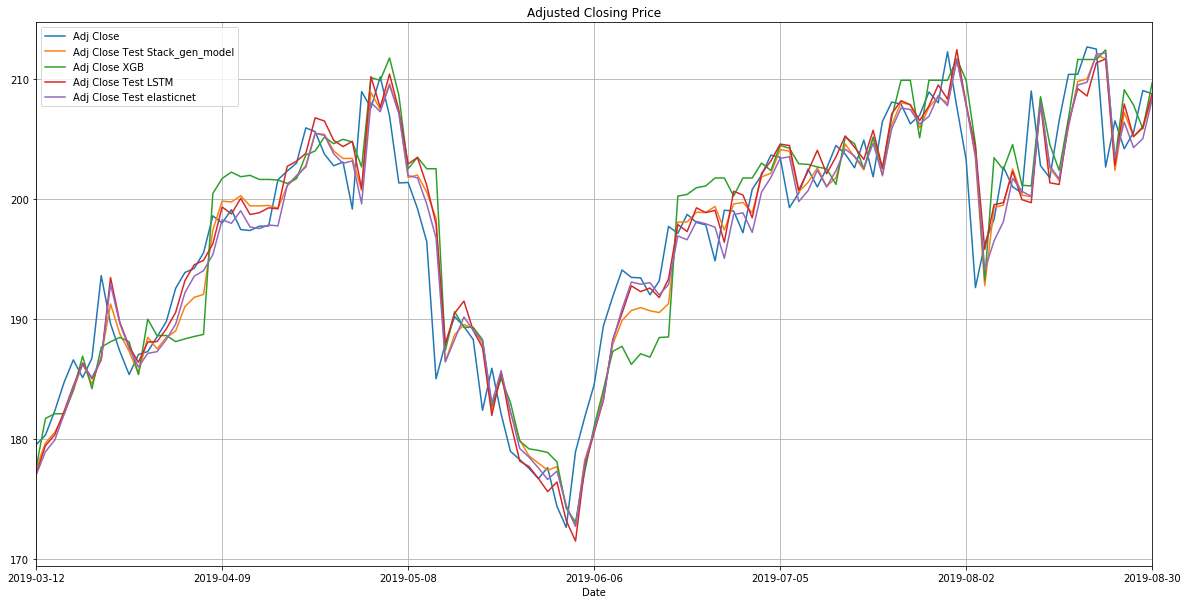

In [0]:
df_test = df.copy()
df_test.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_test = df_test.iloc[window_size+split_time:] 
df_test['Adj Close Test Stack_gen_model'] = stack_gen_model.predict(X_test)
df_test['Adj Close XGB']= xgboost_model.predict(X_test)
df_test['Adj Close Test LSTM'] = y_pred_keras_3 
#df_test['Adj Close Test Ridge'] = ridge.predict(X_test)
df_test['Adj Close Test elasticnet'] = elasticnet.predict(X_test)
df_test.plot(label='AAPL', figsize=(20,10), title='Adjusted Closing Price', grid=True)


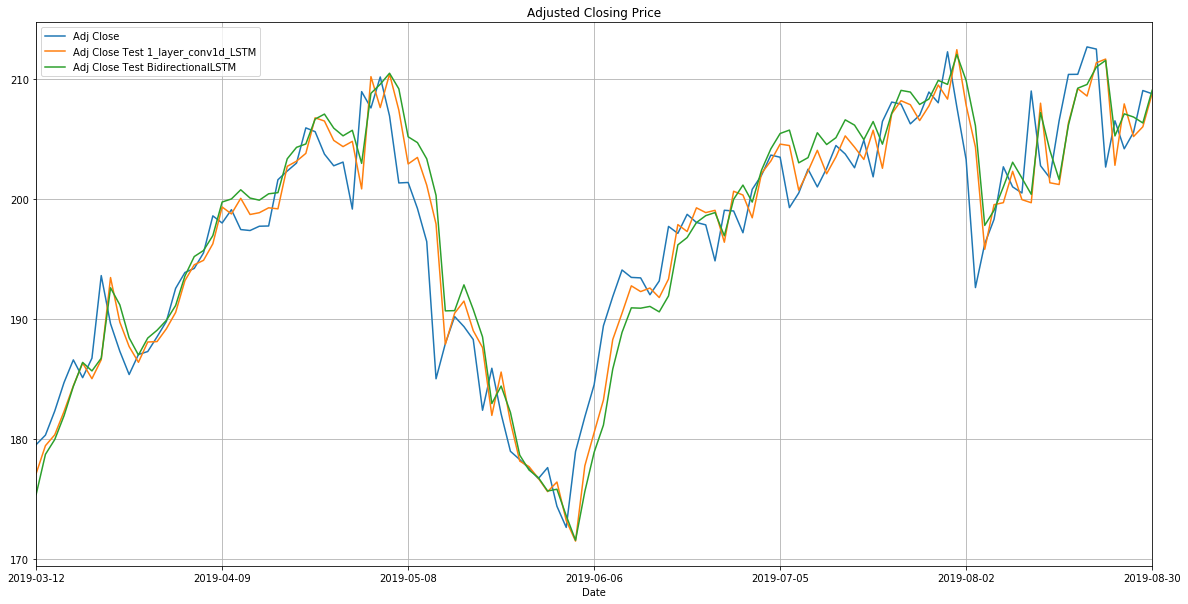

In [0]:
df_test = df.copy()
df_test.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_test = df_test.iloc[window_size+split_time:]
df_test['Adj Close Test 1_layer_conv1d_LSTM'] = y_pred_keras_3 
df_test['Adj Close Test BidirectionalLSTM'] = y_pred_keras_2 
#df_test['Adj Close Test elasticnet'] = elasticnet.predict(X_test)
df_test.plot(label='AAPL', figsize=(20,10), title='Adjusted Closing Price', grid=True)
